In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras import datasets,layers,models
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
def plt_show(x,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
 

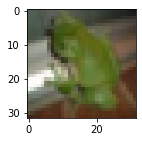

In [24]:
plt_show(x_test,7)

In [25]:
y_train=y_train.reshape(-1,)

In [26]:
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [27]:
x_train=x_train/255
x_test=x_test/255

Model Buidling and Training

In [40]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=42,activation="relu",kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)),
    layers.MaxPool2D((2,2)),
    #dense layer
    layers.Flatten(),
    keras.layers.Dense(72,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
    
])

In [42]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [43]:
cnn.fit(x_train,y_train,epochs=12)

Epoch 1/12
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4750 - accuracy: 0.4693
Epoch 2/12
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1333 - accuracy: 0.6009
Epoch 3/12
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0068 - accuracy: 0.6475
Epoch 4/12
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9239 - accuracy: 0.6790
Epoch 5/12
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8517 - accuracy: 0.7003
Epoch 6/12
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8029 - accuracy: 0.7183
Epoch 7/12
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7512 - accuracy: 0.7375
Epoch 8/12
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7117 - accuracy: 0.7481
Epoch 9/12
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6760 - accuracy: 0.7629
Epoch 10/12
1563/1563 [==============================] - 49s 31m

In [44]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9328 - accuracy: 0.6982


[0.9327505826950073, 0.698199987411499]

In [46]:
y_pre=cnn.predict(x_test)

In [48]:
ypre=[np.argmax(i) for i in y_pre]

In [53]:
ypre[:10]

[3, 8, 1, 0, 6, 6, 1, 6, 3, 1]

In [54]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [51]:
y_test=y_test.reshape(-1,)

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypre)

<AxesSubplot:>

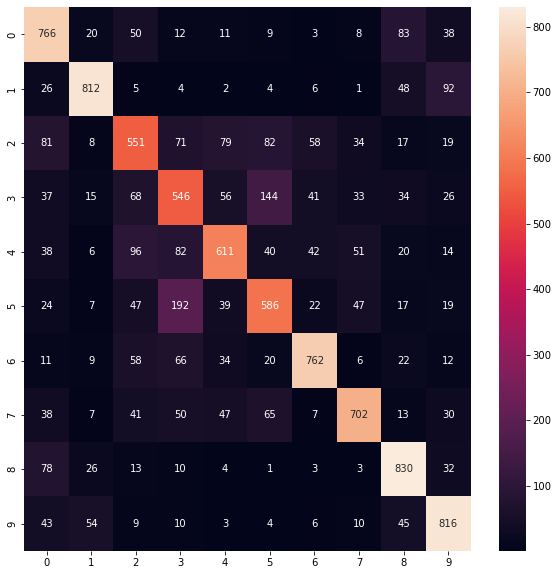

In [58]:
plt.figure(figsize=(10,10))
plt.xlabel("prediction")
plt.ylabel("True")
sns.heatmap(cm,annot=True,fmt="d")

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.84      0.81      0.83      1000
           2       0.59      0.55      0.57      1000
           3       0.52      0.55      0.53      1000
           4       0.69      0.61      0.65      1000
           5       0.61      0.59      0.60      1000
           6       0.80      0.76      0.78      1000
           7       0.78      0.70      0.74      1000
           8       0.74      0.83      0.78      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

